# 第 3 讲：插值、拟合

## Taylor 多项式

Taylor 多项式在 $x_0$ 点展开，以逼近函数 $f$.

$$P_n(x)=f(x_0)+f^\prime(x_0)(x-x_0)+\frac{f^{\prime\prime}(x_0)}{2!}(x-x_0)^2+\dots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

或写成 $$P_n(x)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$

用 $P_n(x)$ 在 $x_0$ 附近逼近函数 $f(x)$ 的**截断误差**使用余项 $R_n(x)$ 表示，它满足 

$$R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{(n+1)}$$

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

以 $f(x)=\rm{e}^{x}$ 在 $x_0=0$ 上的 Taylor 逼近为例

In [2]:
def factorial(n):
    '''
       递归地生成阶乘
       这不是一个递归的好例子，只是为方便实现
    '''
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def poly_coef_exp(n):
    '''
        生成在 x=0 处逼近指数函数 f = exp(x) 多项式的系数
        n 是多项式的阶数
    '''
    coefficients = []
    for i in range(n + 1):
        coefficients.append(1 / factorial(i))
    return coefficients

In [3]:
# 测试系数
print(poly_coef_exp(4))

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664]


In [4]:
# 生成一个 4 阶多项式
p = poly.Polynomial(poly_coef_exp(4))

# 创建 x
x = np.linspace(-1, 3, 50)

# 使用多项式创建 y
y = p(x)

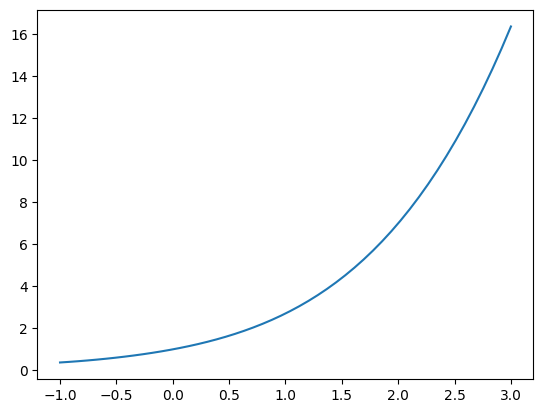

In [5]:
# 尝试作图
plt.plot(x, y)

In [6]:
# 综合以上尝试
def plot_poly_approx(n, x, poly_coef):
    '''
        一次性画出在 x=0 处逼近指数函数 f = exp(x) 不同阶的多项式
    '''
    
    for i in range(n):
        poly_coefficients = poly.Polynomial(poly_coef_exp(i))
        plt.plot(x, poly_coefficients(x), color='blue', alpha=0.1+0.8*i/n)
    
    return

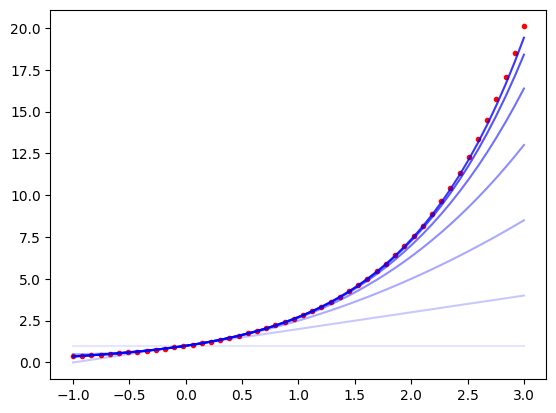

In [7]:
# "真实"的指数函数图像
plt.plot(x, np.exp(x), 'r.')
# 以不同阶多项式逼近的函数图像
plot_poly_approx(7, x, poly_coef_exp)

## Lagrange 插值

Lagrange 插值不仅使用 $x_0$ 处的信息，还使用 $x_1,x_2,\dots,x_n$ 等一共 $(n+1)$ 个点的信息.

为此，所构造的基函数形如 

$$L_k(x)=\prod_{i=0,i\ne k}^n \frac{(x-x_i)}{(x_k-x_i)}$$

它满足 $$L_{k}(x_i) = \begin{cases}
        1\quad\text{当}\;i=k,
        \\
        0\quad\text{当}\;i\ne k.
        \end{cases}\quad i=0,1,\dots,n$$
        
如此，则 Lagrange 插值多项式为 $$P_n(x)=\sum_{k=0}^n f(x_k)L_k(x)$$

### 线性插值

线性插值使用两个点 $x_0,x_1$，构造基函数 $$L_0(x)=\frac{x-x_1}{x_0-x_1},\;\text{和}\;L_1(x)=\frac{x-x_0}{x_1-x_0}$$

插值多项式为 $$P(x)=L_0(x)f(x_0)+L_1(x)f(x_1)$$

In [8]:
# 示例插值节点的 x 值
xvalues = [2, 5]
# 示例插值节点的 y 值
yvalues = [4, 1]

#### 根据公式计算

In [9]:
def lagrange_basis_at(x, i, xs):
    n = len(xs)
    assert i in range(n), '所给下标超出范围'
    
    p = 1
    for k in range(n):
        if k != i:
            print(f'k={k}, i={i}: ({x} - {xs[i]})/({xs[k]} - {xs[i]})')
            p *= (x - xs[k]) / (xs[i] - xs[k])
    return p

In [10]:
print(lagrange_basis_at(2, 0, xvalues), lagrange_basis_at(5, 0, xvalues))

k=1, i=0: (2 - 2)/(5 - 2)
k=1, i=0: (5 - 2)/(5 - 2)
1.0 -0.0


In [11]:
print(lagrange_basis_at(2, 1, xvalues), lagrange_basis_at(5, 1, xvalues))

k=0, i=1: (2 - 5)/(2 - 5)
k=0, i=1: (5 - 5)/(2 - 5)
0.0 1.0


In [12]:
def lagrange_interpolate_at(x, xs, ys):
    n = len(xs)
    
    s = 0
    for i in range(n):
        s += lagrange_basis_at(x, i, xs) * ys[i]
    return s

In [13]:
# 确保插值节点上的值等于函数值
lagrange_interpolate_at(2, xvalues, yvalues)

k=1, i=0: (2 - 2)/(5 - 2)
k=0, i=1: (2 - 5)/(2 - 5)


4.0

In [14]:
# 确保插值节点上的值等于函数值
lagrange_interpolate_at(5, xvalues, yvalues)

k=1, i=0: (5 - 2)/(5 - 2)
k=0, i=1: (5 - 5)/(2 - 5)


1.0

In [15]:
# 来看看插值结果
lagrange_interpolate_at(3, xvalues, yvalues)

k=1, i=0: (3 - 2)/(5 - 2)
k=0, i=1: (3 - 5)/(2 - 5)


3.0

#### 函数式编程

In [16]:
import operator
from functools import reduce

def lagrange_basis(xs, i):
    '''
       在点 x_i 计算相应的 Lagrange 基
    '''
    n = len(xs)
    assert i in range(n), '所给下标超出范围'
    
    # 使用高阶函数
    def _basis(x):
        p = [(x - xs[k]) / (xs[i] - xs[k]) for k in range(n) if k != i]
        return reduce(operator.mul, p)
    
    return _basis

In [17]:
# L_0(x)
l0 = lagrange_basis(xvalues, 0)
l1 = lagrange_basis(xvalues, 1)

# lagrange_basis 返回的是一个函数，例如
l0

<function __main__.lagrange_basis.<locals>._basis(x)>

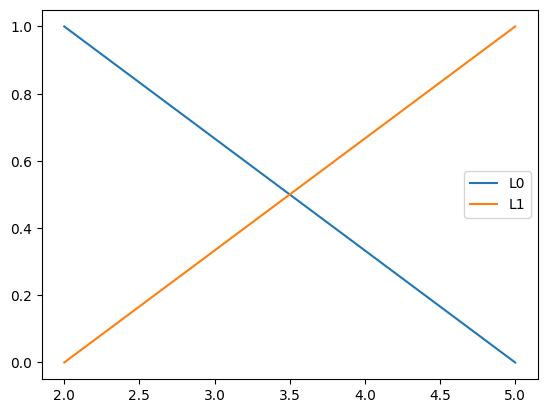

In [18]:
# 为画图作准备
xs = np.linspace(xvalues[0], xvalues[-1], 50)

ys_l0 = [l0(j) for j in xs]
ys_l1 = [l1(j) for j in xs]

# 分别画出在 x_0 和 x_1 处的两个基函数
fig, ax = plt.subplots()
ax1, = ax.plot(xs, ys_l0, label='L0')
ax2, = ax.plot(xs, ys_l1, label='L1')
ax.legend(handles=[ax1, ax2])

In [19]:
def lagrange_interpolate(xs, ys):
    '''
        基函数的线性组合
    '''
    n = len(xs)
    assert len(xs) == len(ys), '所给节点长度不匹配'
    
    # 使用高阶函数
    def _func(x):
        return sum(lagrange_basis(xs, i)(x) * ys[i] for i in range(n))
    
    return _func

In [20]:
# 测试
lagrange_interpolate(xvalues, yvalues)(2)

4.0

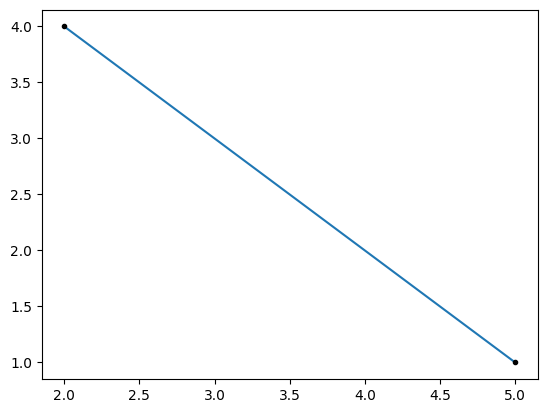

In [21]:
# 利用插值的结果，画出函数图像

xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')

### 抛物线插值

线性插值使用三个点 $x_0,x_1,x_2$，构造基函数 $$L_0(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)},\;L_1(x)=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\;\text{和}\;L_2(x)=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$

插值多项式为 $$P(x)=L_0(x)f(x_0)+L_1(x)f(x_1)+L_2(x)f(x_2)$$

In [22]:
# 示例插值节点的 x 值
xvalues = [0, 2, 5]
# 示例插值节点的 y 值
yvalues = [3, 4, 1]

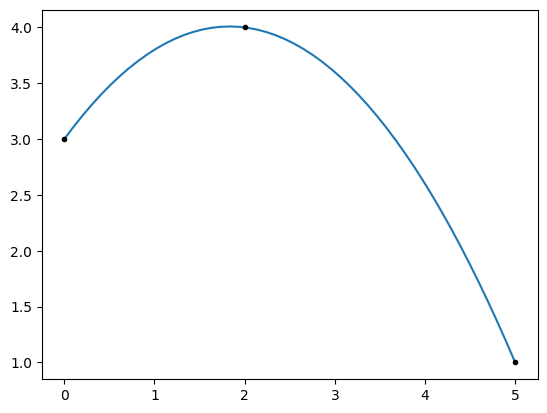

In [23]:
# 利用插值的结果，画出函数图像

xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')

In [24]:
# 顺便探究二次多项式的 Lagrange 基的函数图像
# 这一次，把画图过程包装成函数

def plot_bases(x, n=50):
    xs = np.linspace(x[0], x[-1], n)

    # 分别画出在 x_k 处的基函数
    for i in range(len(x)):
        plt.plot(xs, [lagrange_basis(xvalues, i)(j) for j in xs], label=f'L{i}')
    plt.legend()
    
    return

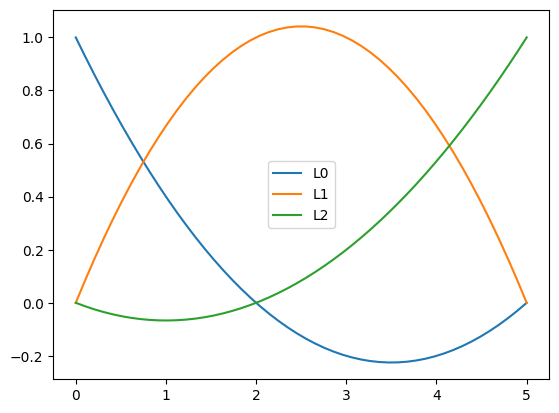

In [25]:
# 画出示例节点的抛物线插值用到的三个基函数
# 注意基函数取值为 0 和 1 的时候所对应的 x 的值
plot_bases(xvalues)

### 放飞自我

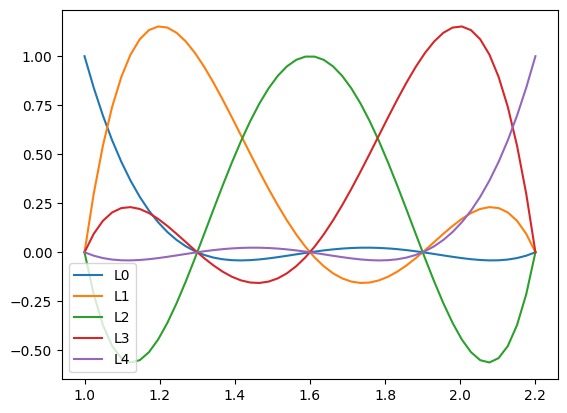

In [26]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

plot_bases(xvalues)

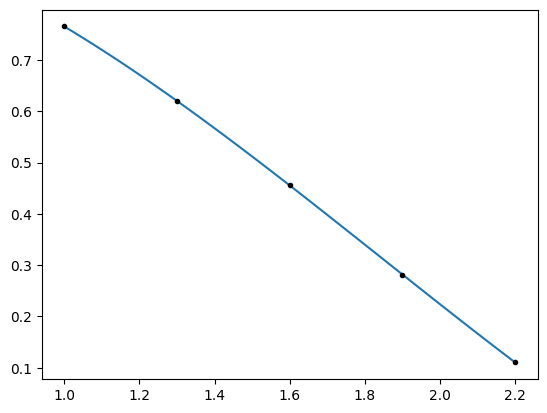

In [27]:
xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')

## Neville 迭代插值

In [28]:
def coef_neville(x, xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    
    q = [[y] + [np.nan] * (n - 1) for y in ys]
    
    for i in range(1, n):
        for j in range(1, n):
            q[i][j] = ((x - xs[i-j]) * q[i][j-1] - (x - xs[i]) * q[i-1][j-1])/(xs[i] - xs[i-j])
    
    return q

In [29]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

table = coef_neville(1.5, xvalues, yvalues)

In [30]:
def print_2d(array):
    for row in array:
        for col in row:
            print(f'{col:12.7f}', end=' ')
        print('')

In [31]:
print_2d(table)

   0.7651977          nan          nan          nan          nan 
   0.6200860    0.5233449          nan          nan          nan 
   0.4554022    0.5102968    0.5124715          nan          nan 
   0.2818186    0.5132634    0.5112857    0.5118127          nan 
   0.1103623    0.5104270    0.5137361    0.5118302    0.5118200 


## Newton 差商

$P_n(x)$ 写为 Newton 差商形式 $$P_n(x)=f[x_0]+\sum_{k=1}^nf[x_0,x_1,\dots,x_k](x-x_0)\dots(x-x_{k-1})$$

需要计算差商系数表

记 $F_{i,j}=f[x_{i-j},\dots,x_i]$. 差商系数 $F_{0,0},F_{1,1},\dots,F_{n,n}$ 满足 $$P_n(x)=F_{0,0}+\sum_{i=1}^n F_{i,i}\prod_{j=0}^{i-1}(x-x_j)$$.


In [32]:
def coef_divided_difference(xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    
    f = [[y] + [np.nan] * (n - 1) for y in ys]
    
    for i in range(1, n):
        for j in range(1, i + 1):
            f[i][j] = (f[i][j-1] - f[i-1][j-1]) / (xs[i] - xs[i-j])
    
    return f

In [33]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

table = coef_divided_difference(xvalues, yvalues)

print_2d(table)

   0.7651977          nan          nan          nan          nan 
   0.6200860   -0.4837057          nan          nan          nan 
   0.4554022   -0.5489460   -0.1087339          nan          nan 
   0.2818186   -0.5786120   -0.0494433    0.0658784          nan 
   0.1103623   -0.5715210    0.0118183    0.0680685    0.0018251 


$$P_n(x)=F_{0,0}+\sum_{i=1}^n F_{i,i}\prod_{j=0}^{i-1}(x-x_j)$$

In [34]:
def newton_polynomial_at(x, xs, ys):
    '''
        在点 x 计算 Newton 多项式逼近
    '''
    
    def _divided_difference(xs, ys):
        assert len(xs) == len(ys), '所给节点长度不匹配'
        n = len(xs)
        
        f = np.zeros((n, n))
        f[:,0] = ys

        for i in range(1, n):
            for j in range(1, i + 1):
                f[i,j] = (f[i,j-1] - f[i-1,j-1]) / (xs[i] - xs[i-j])

        return f
    
    coef = _divided_difference(xs, ys)
    print(coef)
    
    total = coef[0, 0]
    for i in range(1, len(xs)):
        prod = coef[i, i]
        for j in range(i):
            prod *= (x - xs[j])
        total += prod

    return total

In [35]:
p4 = newton_polynomial_at(1.5, xvalues, yvalues)

print(f'{p4:.7f}')

[[ 0.7651977   0.          0.          0.          0.        ]
 [ 0.620086   -0.48370567  0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.10873389  0.          0.        ]
 [ 0.2818186  -0.578612   -0.04944333  0.0658784   0.        ]
 [ 0.1103623  -0.571521    0.01181833  0.06806852  0.0018251 ]]
0.5118200


## Hermite 插值

使用 Newton 差商表示的 Hermite 插值公式

\begin{align*}
H(x)&=Q_{0,0}+Q_{1,1}(x-x_0)+Q_{2,2}(x-x_0)^2+Q_{3,3}(x-x_0)^2(x-x_1)\\
&+Q_{4,4}(x-x_0)^2(x-x_1)^2+\dots\\
&+Q_{2n+1,2n+1}(x-x_0)^2(x-x_1)^2\dots(x-x_{n-1})^2(x-x_n)
\end{align*}

In [36]:
def hermite_polynomial_at(x, xs, ys, yps):
    '''
        在点 x 计算 Hermite 多项式逼近
    '''
    
    def _divided_difference(xs, ys, yps):
        assert len({len(i) for i in [xs, ys, yps]}) == 1, '所给节点长度不匹配'
        n = len(xs)
        
        q = np.zeros((2*n, 2*n))
        z = np.zeros(2*n)
        
        for i in range(n):
            z[2*i] = z[2*i+1] = xs[i]
            q[2*i,0] = q[2*i+1,0] = ys[i]
            q[2*i+1,1] = yps[i]
            if i != 0:
                q[2*i,1] = (q[2*i,0] - q[2*i-1,0]) / (z[2*i] - z[2*i-1])
        
        for i in range(2, 2 * n):
            for j in range(2, i+1):
                q[i,j] = (q[i,j-1] - q[i-1,j-1]) / (z[i] - z[i-j])
        
        return q
    
    coef = _divided_difference(xs, ys, yps)
    print(coef)
    
    total = coef[0, 0]
    for i in range(1, len(xs) * 2):
        prod = coef[i][i]
        for j in range(i):
            prod *= (x - xs[j//2])
        total += prod

    return total

In [37]:
# 示例插值节点的 x 值
xvalues = [1.3, 1.6, 1.9]
# 示例插值节点的 y 值
yvalues = [0.6200860, 0.4554022, 0.2818186]
# 示例插值节点的 yp 值
ypvalues = [-0.5220232, -0.5698959, -0.5811571]

h5 = hermite_polynomial_at(1.5, xvalues, yvalues, ypvalues)

print(f'{h5:.7f}')

[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08974267  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06636556  0.          0.        ]
 [ 0.2818186  -0.578612   -0.02905367  0.06796556  0.00266667  0.        ]
 [ 0.2818186  -0.5811571  -0.00848367  0.06856667  0.00100185 -0.00277469]]
0.5118277


## 三次样条插值

In [38]:
def thomas(a, b, c, d):
    '''
        求解三对角矩阵线性方程组的 Thomas 算法，即"追赶法"
    '''
    
    n = len(d)
    
    # 拷贝系数
    a, b, c, d = map(np.array, (a, b, c, d))
    # 未知向量
    x = np.empty(n)
    
    for i in range(1, n):
        m = a[i] / b[i-1]
        b[i] = b[i] - m * c[i-1] 
        d[i] = d[i] - m * d[i-1]
    
    
    x[-1] = d[-1] / b[-1]

    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]

    return x

In [39]:
# 算例
a = [0, 1, 1, 1] # 下对角线
b = [2, 2, 2, 2] # 主对角线
c = [1, 1, 1, 0] # 上对角线

d = [1, 2, 3, 4] # 右端项

# 测试求解
print(thomas(a, b, c, d))

[0. 1. 0. 2.]


In [40]:
# 构建三对角矩阵
tri_diag = np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)
print(tri_diag)

# 验证解
x = np.linalg.solve(tri_diag, d)
print(x)

tri_diag @ x

[[2 1 0 0]
 [1 2 1 0]
 [0 1 2 1]
 [0 0 1 2]]
[0. 1. 0. 2.]


array([1., 2., 3., 4.])

In [41]:
def cubic_spline(xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    xs, ys = map(np.array, (xs, ys))
    
    h = [xs[i+1] - xs[i] for i in range(n-1)]
    f = [(ys[i+1] - ys[i]) / (xs[i+1] - xs[i]) for i in range(n-1)]
    
    a = [0] + h[:-1] + [0]
    b = [1] + [2 * h[i] + 2 * h[i+1] for i in range(len(h)-1)] + [1]
    c = [0] + h[1:] + [0]
    
    d = [0] + [6*f[i] - 6*f[i-1] for i in range(1, len(f))] + [0]
    
    m = thomas(a, b, c, d)
    
    s = [lambda x, i=j: (m[i]*(xs[i+1]-x)**3 + m[i+1]*(x-xs[i])**3)/6/h[i]+
         f[i]*(x-xs[i]) + ys[i] - h[i]*(m[i+1]-m[i])*(x-xs[i])/6-m[i]*h[i]*h[i]/6 
         for j in range(n-1)]
    
    return s

In [42]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

cubic_spline(xvalues, yvalues)

[<function __main__.cubic_spline.<locals>.<listcomp>.<lambda>(x, i=0)>,
 <function __main__.cubic_spline.<locals>.<listcomp>.<lambda>(x, i=1)>,
 <function __main__.cubic_spline.<locals>.<listcomp>.<lambda>(x, i=2)>,
 <function __main__.cubic_spline.<locals>.<listcomp>.<lambda>(x, i=3)>]

In [43]:
cubic_spline(xvalues, yvalues)[2](1.6)

0.4554022

In [44]:
def plot_spline(f, xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    s = f(xs, ys)
    f, ax = plt.subplots()
    for i in range(n-1):
        x = np.linspace(xs[i], xs[i+1], 50)
        y = [s[i](j) for j in x]
        
        ax.plot(x, y, 'k')
        ax.plot(xs[i], ys[i], 'r.')
    
    ax.plot(xs[-1], ys[-1], 'r.')
    
    return f, ax

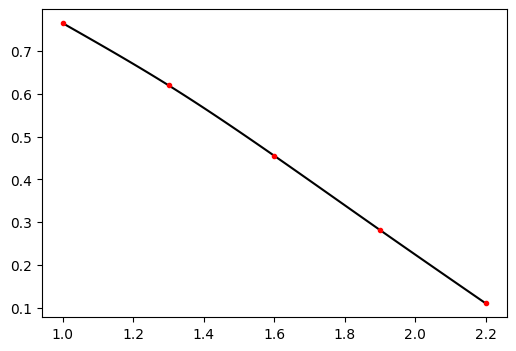

In [45]:
f, _ = plot_spline(cubic_spline, xvalues, yvalues)

f.set_size_inches(6, 4)

### 保时捷

保时捷的车形数据点如图

![porsche](./porsche-grid.png)

In [46]:
# 肉眼描点得到的数据
data = [
    [ 0.0, 0.0],
    [ 3.5, 2.0],
    [ 5.9, 3.1],
    [13.2, 4.2],
    [15.4, 5.0],
    [20.9, 7.6],
    [24.5, 8.3],
    [31.3, 7.8],
    [42.2, 4.8],
    [45.8, 3.4],
    [46.5, 2.2]
]

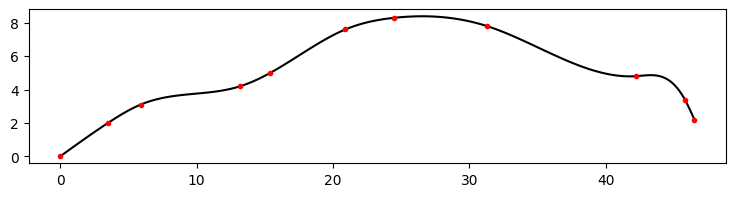

In [47]:
xvalues, yvalues = zip(*data)

f, _ = plot_spline(cubic_spline, xvalues, yvalues)

f.set_size_inches(9, 2)

## 附：Runge 现象

In [48]:
def newton_polynomial(xs, ys):
    '''
        计算 Newton 多项式逼近
    '''
    
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    
    def _divided_difference(xs, ys):
        f = np.zeros((n, n))
        f[:,0] = ys

        for i in range(1, n):
            for j in range(1, i + 1):
                f[i,j] = (f[i,j-1] - f[i-1,j-1]) / (xs[i] - xs[i-j])

        return f
    
    def _func(x):
        coef = _divided_difference(xs, ys)
        
        total = coef[0, 0]
        for i in range(1, len(xs)):
            prod = coef[i, i]
            for j in range(i):
                prod *= (x - xs[j])
            total += prod
        return total

    return _func

In [49]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

# 测试函数
newton_polynomial(xvalues, yvalues)(1.5)

0.5118199942386833

In [50]:
def runge_demo(n):    
    # Runge 函数
    runge_func = lambda x: 1 / (1 + 25 * x ** 2)
    
    xs = np.linspace(-1, 1, 100)
    fig, axs = plt.subplots(n, 1, figsize=(5, 2*n))
    fig.tight_layout()
    
    for i in range(n):
        xvalues = np.linspace(-1, 1, i+1)
        yvalues = [runge_func(j) for j in xvalues]
        
        axs[i].plot(xvalues, yvalues, 'r.')
        axs[i].plot(xs, [runge_func(j) for j in xs], 'k', alpha=0.5)
        axs[i].plot(xs, [newton_polynomial(xvalues, yvalues)(j) for j in xs], 'b')
        axs[i].set_title(f'Interpolation on {i+1} point(s)')
    
    return

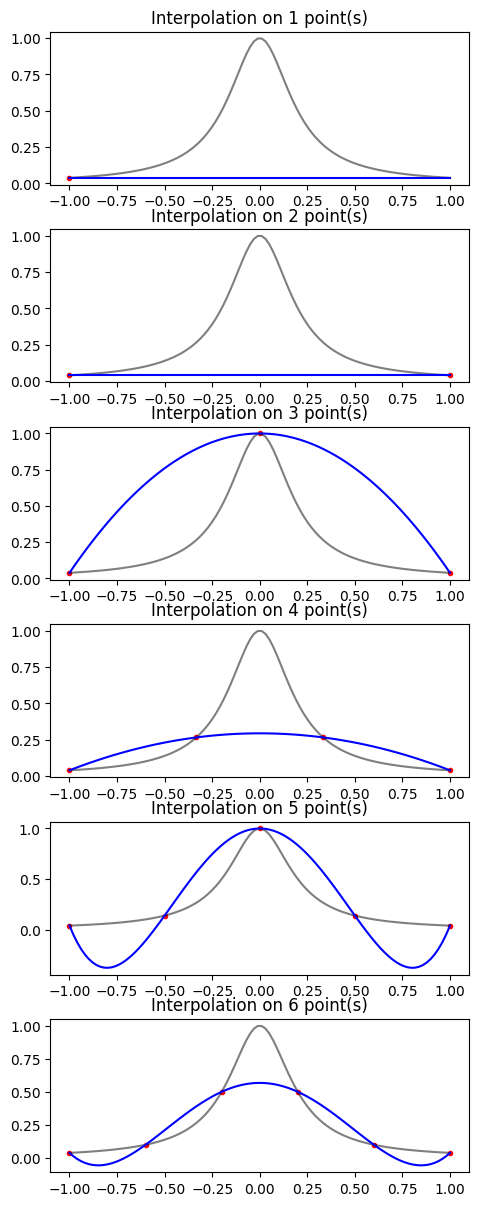

In [51]:
runge_demo(6)